In [1]:
from hgb_maternal_disorder_paf_generation import *
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# only import the following if you are using the artifact environment
#import vivarium_inputs
#from vivarium_gates_mncnh.data.loader import load_hemoglobin_relative_risk


In [4]:
# define some parameters
draw = 60
location = 'pakistan'
population_size = 100 #* 10
results_directory = os.getcwd() + '/'

In [5]:
# load up RR values that are scaled to TMRED outside of the simulation
hgb_rrs = load_hemoglobin_rrs_on_maternal_disorders()
hgb_rrs.head()

,affected_entity,exposure,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,...,draw_490,draw_491,draw_492,draw_493,draw_494,draw_495,draw_496,draw_497,draw_498,draw_499
0,maternal_hemorrhage,40.00000,6.123490,14.947981,7.338021,5.453201,5.681957,12.035978,11.255161,3.407912,...,26.990162,4.561179,9.251000,4.208450,15.919157,8.105121,4.771772,1.999497,8.094513,3.399916
1,maternal_hemorrhage,40.11011,6.115807,14.919999,7.327896,5.446797,5.675122,12.015251,11.236300,3.405018,...,26.928612,4.556386,9.236752,4.204262,15.888664,8.093380,4.766609,1.998537,8.082795,3.397035
2,maternal_hemorrhage,40.22022,6.108122,14.892026,7.317769,5.440390,5.668285,11.994527,11.217442,3.402123,...,26.867108,4.551591,9.222505,4.200072,15.858183,8.081638,4.761443,1.997577,8.071075,3.394151
3,maternal_hemorrhage,40.33033,6.100435,14.864063,7.307641,5.433981,5.661446,11.973807,11.198587,3.399225,...,26.805648,4.546793,9.208257,4.195879,15.827712,8.069894,4.756275,1.996615,8.059355,3.391266
4,maternal_hemorrhage,40.44044,6.092745,14.836108,7.297511,5.427569,5.654604,11.953091,11.179734,3.396326,...,26.744234,4.541993,9.194010,4.191685,15.797254,8.058150,4.751104,1.995652,8.047633,3.388379


In [6]:
# so let's test out that my custom RR assignment replicats simulation's behavior

# starting by getting the sim-specific data
sim = initialize_simulation(location, draw, population_size)
pop = sim.get_population()
sim_rrs = pd.concat(
    [
        pop[["age", "hemoglobin_exposure", "pregnancy_outcome"]],
        sim.get_value("hemoglobin_on_maternal_hemorrhage.relative_risk")(pop.index).rename('maternal_hemorrhage_rr'),
        sim.get_value(
            "hemoglobin_on_maternal_sepsis_and_other_maternal_infections.relative_risk"
        )(pop.index).rename('maternal_sepsis_rr'),
    ],
    axis=1,
)
sim_rrs

2025-10-02 13:19:32.974 | INFO     | simulation_1-artifact_manager:79 - Running simulation from artifact located at /mnt/team/simulation_science/pub/models/vivarium_gates_mncnh/artifacts/model18.0/pakistan.hdf.
2025-10-02 13:19:32.976 | INFO     | simulation_1-artifact_manager:80 - Artifact base filter terms are ['draw == 60'].
2025-10-02 13:19:32.977 | INFO     | simulation_1-artifact_manager:81 - Artifact additional filter terms are None.
2025-10-02 13:20:00.358 | WARNING  | simulation_1-results_manager:446 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-10-02 13:20:00.361 | WARNING  | simulation_1-results_manager:446 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-10-02 13:20:00.547 | INFO     | simulation_1-results_context:129 - The following stratifications are registered but not used by any observers: 
['sex']


,age,hemoglobin_exposure,pregnancy_outcome,maternal_hemorrhage_rr,maternal_sepsis_rr
0,32.746049,136.060000,live_birth,0.933098,0.941583
1,29.623072,138.365338,live_birth,0.929293,0.942306
2,31.642677,89.926698,live_birth,2.213297,3.079054
3,31.319773,87.142462,live_birth,2.414121,3.277666
4,21.414469,131.857571,partial_term,0.946859,0.940313
...,...,...,...,...,...
95,26.047231,89.082019,live_birth,2.273545,3.142118
96,20.639786,149.106233,live_birth,0.955990,0.945677
97,27.457527,100.787703,live_birth,1.518501,2.096176
98,29.034496,135.230002,partial_term,0.935188,0.941322


In [7]:
# now load up the ones that I assign
alibow_rrs = load_rrs(location, draw, population_size, hgb_rrs)
alibow_rrs.head()

2025-10-02 13:21:00.232 | INFO     | simulation_2-artifact_manager:79 - Running simulation from artifact located at /mnt/team/simulation_science/pub/models/vivarium_gates_mncnh/artifacts/model18.0/pakistan.hdf.
2025-10-02 13:21:00.233 | INFO     | simulation_2-artifact_manager:80 - Artifact base filter terms are ['draw == 60'].
2025-10-02 13:21:00.234 | INFO     | simulation_2-artifact_manager:81 - Artifact additional filter terms are None.


2025-10-02 13:21:27.828 | WARNING  | simulation_2-results_manager:446 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-10-02 13:21:27.830 | WARNING  | simulation_2-results_manager:446 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-10-02 13:21:28.011 | INFO     | simulation_2-results_context:129 - The following stratifications are registered but not used by any observers: 
['sex']


,age,hemoglobin_exposure,pregnancy_outcome,neonatal_sepsis_early_neonatal_female,neonatal_sepsis_early_neonatal_male,neonatal_sepsis_late_neonatal_female,neonatal_sepsis_late_neonatal_male,maternal_hemorrhage_rr,maternal_sepsis_and_other_maternal_infections_rr,depressive_disorders_rr,age_group,location
0,32.746049,136.060000,live_birth,0.971624,0.969966,0.965540,0.967057,0.933098,0.941583,0.976818,30_to_34,pakistan
1,29.623072,138.365338,live_birth,0.964129,0.962119,0.958127,0.960035,0.929293,0.942306,0.976971,25_to_29,pakistan
2,31.642677,89.926698,live_birth,1.182076,1.192621,1.181323,1.203041,2.213297,3.079054,1.464836,30_to_34,pakistan
3,31.319773,87.142462,live_birth,1.174424,1.189588,1.179234,1.206988,2.414121,3.277666,1.485706,30_to_34,pakistan
4,21.414469,131.857571,partial_term,0.993132,0.992953,0.987477,0.988861,0.946859,0.940313,0.976539,20_to_24,pakistan


In [8]:
# check that they are the same for the comparisons we are able to make
    # That's for hemorrhage and sepsis because those are the only two causes we have RRs for in the simulation
round = 10
assert np.all(sim_rrs.maternal_hemorrhage_rr.round(round).equals(alibow_rrs.maternal_hemorrhage_rr.round(round))), "Difference in hemorrhage RRs"
assert np.all(sim_rrs.maternal_sepsis_rr.round(round).equals(alibow_rrs.maternal_sepsis_and_other_maternal_infections_rr.round(round))), "Difference in sepsis RRs"

In [ ]:
pafs = calculate_pafs(location, draw, population_size, hgb_rrs)
pafs

# note, I ran at such a small population size here (100) that some age groups are not represented

2025-10-02 13:22:19.426 | INFO     | simulation_3-artifact_manager:79 - Running simulation from artifact located at /mnt/team/simulation_science/pub/models/vivarium_gates_mncnh/artifacts/model18.0/pakistan.hdf.
2025-10-02 13:22:19.427 | INFO     | simulation_3-artifact_manager:80 - Artifact base filter terms are ['draw == 60'].
2025-10-02 13:22:19.428 | INFO     | simulation_3-artifact_manager:81 - Artifact additional filter terms are None.
2025-10-02 13:22:45.489 | WARNING  | simulation_3-results_manager:446 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-10-02 13:22:45.491 | WARNING  | simulation_3-results_manager:446 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-10-02 13:22:45.659 | INFO     | simulation_3-results_context:129 - The following stratifications are registered but not used by any observers: 
['sex']


,location,age_group,maternal_hemorrhage_rr,maternal_sepsis_and_other_maternal_infections_rr,depressive_disorders_rr,neonatal_sepsis_early_neonatal_female,neonatal_sepsis_early_neonatal_male,neonatal_sepsis_late_neonatal_female,neonatal_sepsis_late_neonatal_male
0,pakistan,10_to_14,0.501599,0.647622,0.305976,NaN,NaN,NaN,NaN
1,pakistan,15_to_19,0.468714,0.550428,0.222669,NaN,NaN,NaN,NaN
2,pakistan,20_to_24,0.258607,0.342918,0.111295,NaN,NaN,NaN,NaN
3,pakistan,25_to_29,0.380796,0.484936,0.177406,NaN,NaN,NaN,NaN
4,pakistan,30_to_34,0.313216,0.420442,0.141585,NaN,NaN,NaN,NaN
5,pakistan,35_to_39,0.298654,0.348230,0.089248,NaN,NaN,NaN,NaN
6,pakistan,40_to_44,0.112624,0.241110,0.094892,NaN,NaN,NaN,NaN
7,pakistan,45_to_49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,pakistan,50_to_54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,pakistan,N/A,NaN,NaN,NaN,0.027372,0.035653,0.030387,0.043032


In [10]:
# great, that code is working fine. Now let's check some different population sizes
paf_data = pd.DataFrame()
for pop_size in [20_000, 200_000, 500_000, 1_000_000, 1_500_000, 2_000_000, 3_000_000]:
    print(f'Running population size {pop_size}')
    pafs = calculate_pafs(location, draw, pop_size, hgb_rrs)
    pafs['population_size'] = pop_size
    paf_data = pd.concat([paf_data, pafs], axis=0)

Running population size 20000
2025-10-02 13:23:36.504 | INFO     | simulation_4-artifact_manager:79 - Running simulation from artifact located at /mnt/team/simulation_science/pub/models/vivarium_gates_mncnh/artifacts/model18.0/pakistan.hdf.
2025-10-02 13:23:36.505 | INFO     | simulation_4-artifact_manager:80 - Artifact base filter terms are ['draw == 60'].
2025-10-02 13:23:36.506 | INFO     | simulation_4-artifact_manager:81 - Artifact additional filter terms are None.


2025-10-02 13:24:02.432 | WARNING  | simulation_4-results_manager:446 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-10-02 13:24:02.433 | WARNING  | simulation_4-results_manager:446 - Specified excluded stratifications are already not included by default: ['stillbirth', 'partial_term']
2025-10-02 13:24:02.601 | INFO     | simulation_4-results_context:129 - The following stratifications are registered but not used by any observers: 
['sex']
Running population size 200000
2025-10-02 13:24:58.328 | INFO     | simulation_5-artifact_manager:79 - Running simulation from artifact located at /mnt/team/simulation_science/pub/models/vivarium_gates_mncnh/artifacts/model18.0/pakistan.hdf.
2025-10-02 13:24:58.329 | INFO     | simulation_5-artifact_manager:80 - Artifact base filter terms are ['draw == 60'].
2025-10-02 13:24:58.330 | INFO     | simulation_5-artifact_manager:81 - Artifact additional filter terms are None.
2025-10-02 13:25:

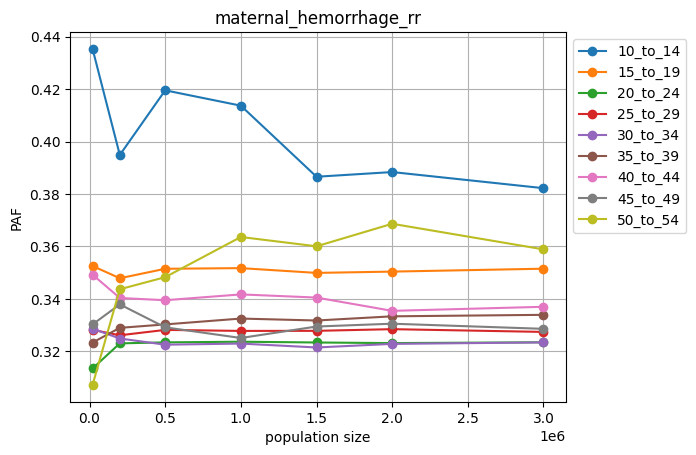

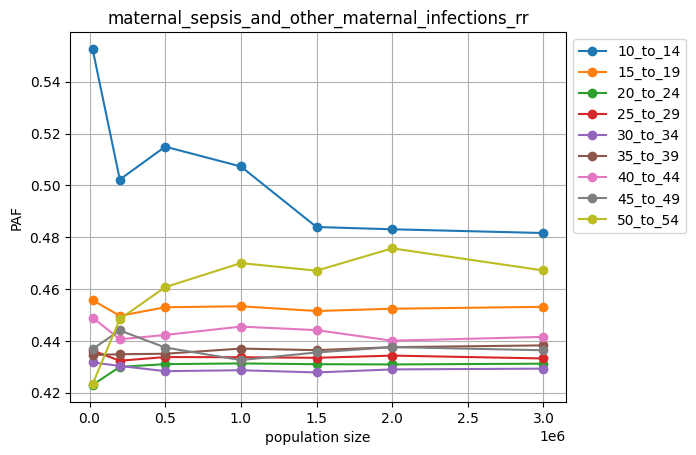

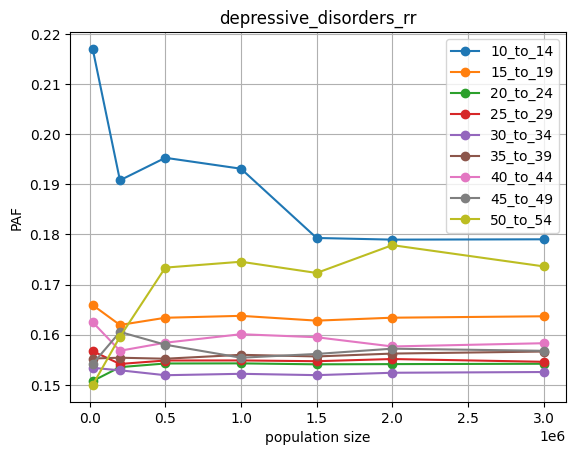

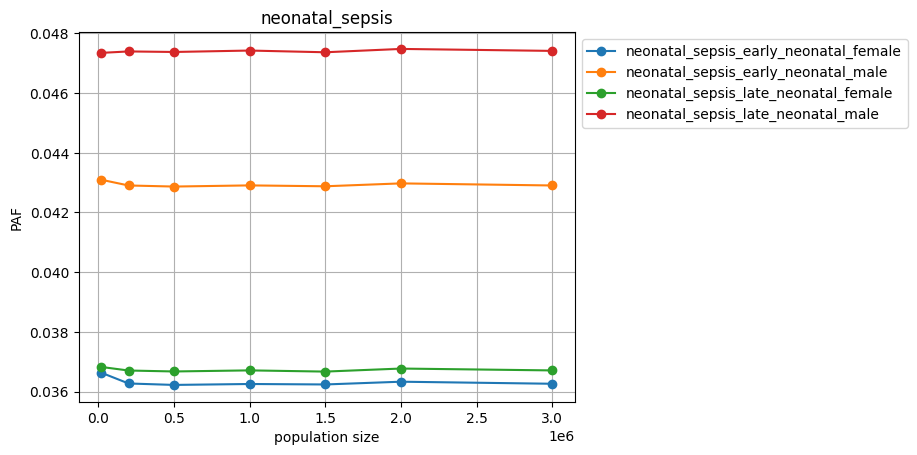

In [11]:
for outcome in ['maternal_hemorrhage_rr', 'maternal_sepsis_and_other_maternal_infections_rr', 'depressive_disorders_rr', 'neonatal_sepsis']:
    plt.figure()
    if outcome == 'neonatal_sepsis':
        for col in [x for x in paf_data.columns if 'neonatal_sepsis' in x]:
            subset = paf_data.loc[paf_data.age_group=='N/A']
            plt.plot(subset.population_size, subset[col], label=col, marker='o')
    else:
        for age_group in [x for x in paf_data.age_group.unique() if x != 'N/A']:
            subset = paf_data.loc[paf_data.age_group==age_group]
            plt.plot(subset.population_size, subset[outcome], label=age_group, marker='o')
    plt.xlabel('population size')
    plt.ylabel('PAF')
    plt.title(outcome)
    plt.legend(bbox_to_anchor=[1,1])
    plt.grid()


# so for the MD outcomes, the dark blue and yellow/green lines are the age groups with the smallest population size represented in the simulated pop
# so these are the most wiggly

# our age groups with the more density are looking pretty stable by 500_000, but let's run a bit higher for the others

# note that an improvement to this process would be to evenly distribute our population across age groups to have a more statistical efficiency
# but that's more work that it's worth for now... we will just run at a higher population size and be okay with less efficiency and also know that 
# our "edge" age groups have small impact on model since there is such low density in them

In [12]:
# will wait for GBD 2023 update to neonatal sepsis RR values before finalizing decision on population size and running actual PAF calculations